<a href="https://colab.research.google.com/github/janetstefanov/macro_psets/blob/main/Macro_ta9_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np 

#np array allows you to do operations on the list such as the one in how the function is defined
d = np.array([1,5,9,10,25])
fv = 14

def change_recursive(fv, d):
  d_search = d[d <= fv]
  #return d_search
  if fv in d: 
    optimal_number_coins = 1
  else: 
    candidates = []
    for di in d_search: 
      candidates.append(change(fv-di,d))
    candidates = np.array(candidates)   
    #x = d[np.argmin(candidates)]
    opt_change = np.min(candidates)
    optimal_number_coins = 1 + opt_change 
  return optimal_number_coins

print(change_recursive(fv,d))  

2.0


In [32]:
#storing the values we have already computed in an array
d = np.array([1,5,9,10,25])
#fv = 14

#C gives us the optimal number of coins in each position (so minimum coinage in 1 in position 0, minimum coinage in 2 in position 1)
#C = np.array([])
def change_array(fv, d):
  C = np.array([])
  for coin_values in range(1, fv+1):  
    d_search = d[d <= coin_values]
    if coin_values in d: 
      optimal_number_coins = 1
      C = np.append(C, optimal_number_coins)
    else: 
      candidates = []
      for di in d_search: 
        candidates.append(C[coin_values - di-1])
      candidates = np.array(candidates)   
      opt_change = np.min(candidates)
      C = np.append(C, opt_change+1)
  optimal_number_coins = C[fv-1] 
  return optimal_number_coins

print(change_array(8,d))

4.0


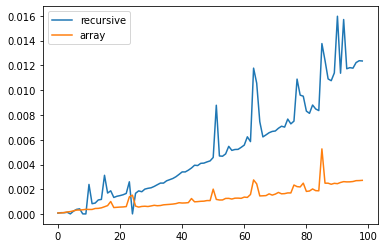

In [37]:
import time
import matplotlib.pyplot as plt

time_rec = []
time_arr = []
for fvs in range(1,100):
  start = time.time()
  change_recursive(fvs, d)
  end = time.time()
  time_rec.append(end-start)
  start = time.time()
  change_array(fvs, d)
  end = time.time()
  time_arr.append(end - start)

plt.plot(time_rec, label = 'recursive')
plt.plot(time_arr, label = 'array')
plt.legend()